Parseval's theorem states that the energy (sum of the squares) of a signal in the time domain must be equal to the energy of the signal in the frequency domain. When using a Fast Fourier Transform (FFT) to find the frequency domain representation of a time-series signal, Parseval's theorem can be used to prove that the scaling is correct.

Let's examine what this looks like in practice. The following code will create a time-series signal using random data, find the frequency-domain using an FFT, and compare the energy of the two representations.

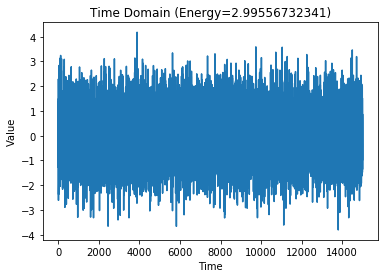

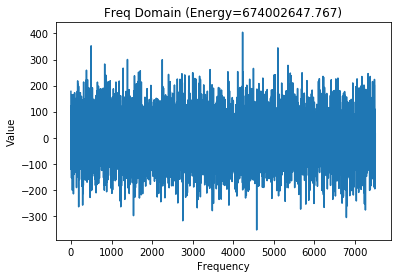

In [1]:
import numpy as np
import pandas as pd
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def calculate_fft(wf, T, N):
    # xf is the frequency ("x") axis of the half-width fft, 
    # yf is the raw fft, yfs is the scaled fft, and yfsh is
    # the scaled half-width fft
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    yf = fft(wf)
    yfs = (1/N) * np.abs(yf)   
    yfsh = (1/N) * np.abs(yf[0:np.int(N/2)]) 
    return xf, yf, yfs, yfsh

### Testing on random data
N1 = 15000 # length of the array
Fs1 = 5000  # sampling rate (Hz)
T1 = 1/Fs1 # time between data samples
x1 = np.random.randn(N1)
xf1, yf1, yfs1, yfsh1 = calculate_fft(x1, T1, N1)
# Checking using Parseval's theorem- these two should be equal
# power in time domain is equal to power in frequency domain
ts_energy1 = sum(np.power(x1,2))*T1 # multiply by dt=T1
fr_energy1 = sum(np.power(np.abs(yf1),2))*N1*T1 # multiply by df=N1*T1
# Time-series plot
plt.figure()
plt.plot(x1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Domain (Energy=' + str(ts_energy1) + ')')
# Frequency plot
plt.figure()
plt.plot(yf1[0:np.int(N1/2)]) # half-width unscaled FFT
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Freq Domain (Energy=' + str(fr_energy1) + ')');

The data was randomly sampled from a normal distribution, so it makes sense that there were no significant "peaks" in the data, since there are no harmonic components in the time domain. 

Note that the energy of the two representations (shown in the plot titles) are different by many orders of magnitude. What went wrong? The scaling of the FFT in the above plots was incorrect- we need to divide the FFT by the number of data samples (N). The following code will scale the FFT appropriately, so that the energy in each representation is the same.

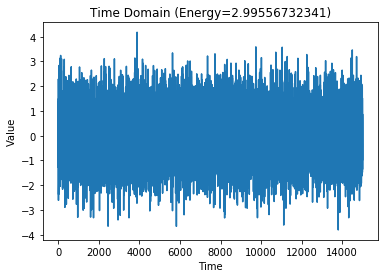

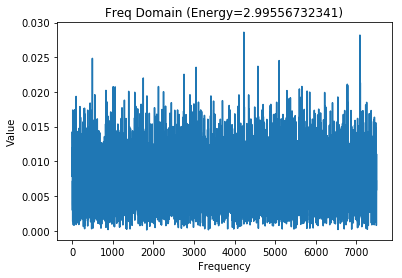

In [2]:
fr_energy1b = sum(np.power(yfs1,2))*N1*T1 # multiply by df=N1*T1
# Time-series plot
plt.figure()
plt.plot(x1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Domain (Energy=' + str(ts_energy1) + ')')
# Frequency plot
plt.figure()
plt.plot(yfsh1) 
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Freq Domain (Energy=' + str(fr_energy1b) + ')');

Notice that the energy of both representations are now equivalent, which verifies that the FFT was scaled correctly.

Let's try this same analysis on a data set that does contain harmonic components. The following code will generate a time-domain signal with two primary frequency components at 60 Hz and 180 Hz, along with random noise.

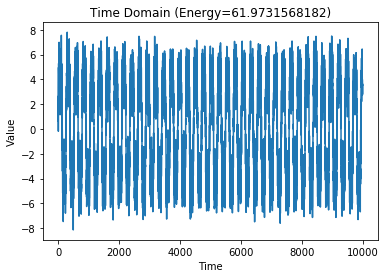

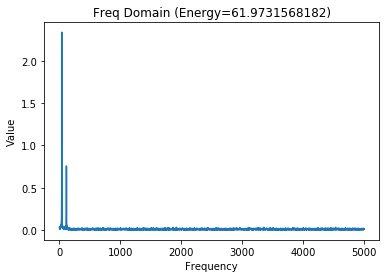

In [3]:
### Testing on harmonic data
N2 = 10000 # length of the array
Fs2 = 2500  # sampling rate (Hz)
T2 = 1/Fs2 # time between data samples
t2 = np.linspace(0, N2/Fs2, N2)
x2 = 5*np.sin(t2*60) + 2*np.sin(t2*180) + np.random.randn(N2)
xf2, yf2, yfs2, yfsh2 = calculate_fft(x2, T2, N2)
# Checking using Parseval's theorem- these two should be equal
# power in time domain is equal to power in frequency domain
ts_energy2 = sum(np.power(x2,2))*T2 # multiply by dt=T2
fr_energy2 = sum(np.power(yfs2,2))*N2*T2 # multiply by df=N2*T2
# Time-series plot
plt.figure()
plt.plot(x2)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Domain (Energy=' + str(ts_energy2) + ')')
# Frequency plot
plt.figure()
plt.plot(yfsh2) # use the correctly-scaled FFT
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Freq Domain (Energy=' + str(fr_energy2) + ')');

Although some harmonic behavior is evident in the time domain, the 60 Hz and 180 Hz components can be seen clearly in the frequency domain. The energy of both representations are equivalent, proving that the scaling of the FFT was selected correctly.